In [15]:
import numpy as np
import matplotlib.pyplot as plt
import VisualDataMaker
import CNNRegressionAndSoftmax as CRS
import tensorflow as tf


In [16]:
data, OHE_LABELS = VisualDataMaker.combine("./random_BG_IMG/n_data/n_data/*.jpg", "./original_DOB_images/*.png")
bounded_DOB = VisualDataMaker.plot_bounding_box(data)

In [17]:
batch = []
regr_truth = []
class_truth = []
for i in range(len(data)):
    batch.append(data[i][0])
    regr_truth.append([data[i][2][0], data[i][2][1], data[i][3]])
    class_truth.append(OHE_LABELS[data[i][1]])
    

In [18]:
batch = np.array(batch)
regr_truth = np.array(regr_truth)
class_truth = np.array(class_truth)

In [19]:
batch.shape, regr_truth.shape, class_truth.shape

((19800, 224, 224, 3), (19800, 3), (19800, 10))

In [21]:
batch = tf.keras.backend.constant(batch)

In [22]:
model = CRS.getUntrainedModel()

In [23]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 224, 224, 16  448         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 224, 224, 16  64         ['conv2d_5[0][0]']               
 rmalization)                   )                                                           

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="class_accuracy", patience=5, restore_best_weights=True),
    tf.keras.callbacks.EarlyStopping(monitor="boundary_box_mse", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="class_accuracy", patience=2),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="boundary_box_mse", patience=2),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [28]:
#model.fit(batch, [class_truth, regr_truth], epochs=100, batch_size=32, callback=my_callbacks)

In [ ]:
#model.save("./Saved_Models/CNN_Regression_and_Softmax")

In [ ]:
from PIL import Image

In [ ]:
def wrapper(img1, img2):
    #img1_prediction = model.predict(img1)
    #img2_prediction = model.predict(img2)

    #img1_DOB_side = img1_prediction[0]
    #img2_DOB_side = img2_prediction[0]

    #img1_size = img1_prediction[3]
    #img2_size = img2_prediction[3]

    #scaling_factor = 0
    #if img1_size < img2_size:
    #   scaling_factor = img1_size // img2_size
    #else:
    #   scaling_factor = img2_size // img1_size
    #return scaling_factor, img1_DOB_side, img2_DOB_side
    pass

In [ ]:
img1 = Image.fromarray(data[0][0])
img2 = Image.fromarray(data[1][0])

In [ ]:
img2 = img2.resize((112, 112))

In [ ]:
pad = Image.new(img2.mode, (224, 224), (0,0,255))

In [ ]:
pad.paste(img2, (56,56))

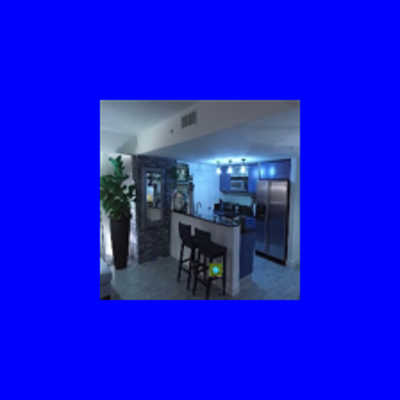

In [ ]:
pad.resize((400,400))

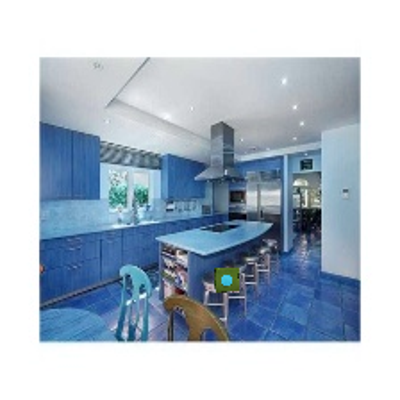

In [ ]:
img1.resize((400,400))